# Классификация СC50 превышает медианное значение

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
target = 'SI'

In [59]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [60]:
df["SI_gt_median"] = (df[target] > df[target].median()).astype(int)

In [61]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,1
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,1
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,0
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,1
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0


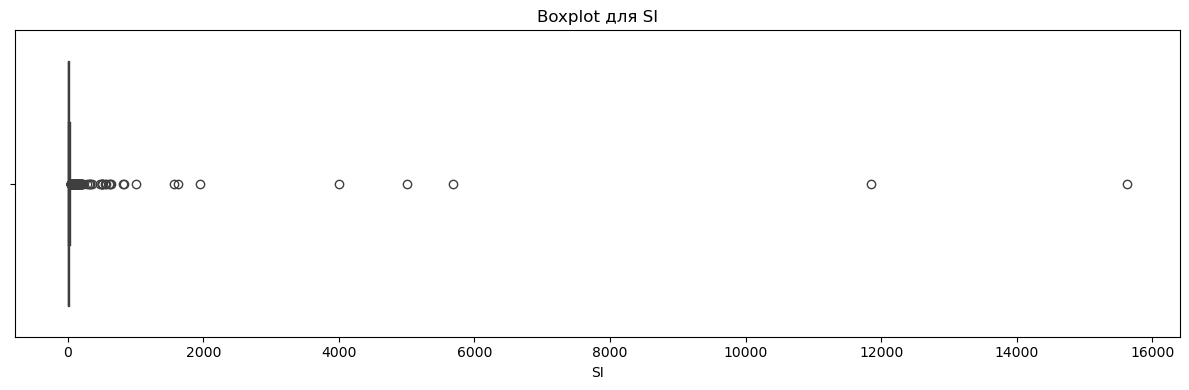

In [62]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [63]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median
102,0.339166,-0.801008,0.583045,-0.034586,0.672790,-0.764201,0.970667,-0.645394,0.560849,-0.464267,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.393088,1965.439708,5000.000000,1
748,0.119444,-0.938375,-0.017240,0.427914,-0.252222,-0.529055,0.730559,-0.913366,1.479895,-0.467427,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.003517,19.999437,5687.000000,1
750,0.119444,-0.938375,-0.017240,0.427914,-0.252222,-0.529055,0.730559,-0.913366,1.479895,-0.467427,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.021100,250.001758,11848.333333,1
772,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.032009,128.090060,4001.700000,1
775,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.016004,249.999200,15620.600000,1


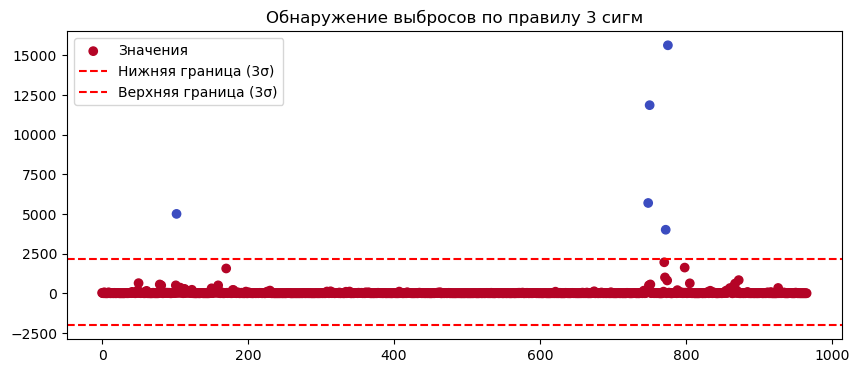

In [64]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [65]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median,is_outlier_3σ,is_outlier_IQR
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,1,False,True
9,-1.446717,0.351971,0.763797,-0.650039,0.554459,0.917583,-0.865343,-0.642440,-2.242239,-0.468731,...,-0.238522,-0.27518,-0.169643,-0.085436,6.400847,400.906360,62.633333,1,False,True
41,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,15.078486,1344.065056,89.137931,1,False,True
44,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,22.825266,1254.135512,54.945055,1,False,True
47,-1.758664,1.295320,0.865404,-1.586508,0.639545,0.918595,-1.556297,1.522921,-2.534171,-0.581647,...,-0.238522,-0.27518,7.131714,-0.085436,45.006900,2216.216562,49.241706,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.598544,0.781167,-0.436645,0.552863,-0.589995,-0.561052,0.857677,-0.425583,-0.587957,-0.451673,...,-0.238522,-0.27518,-0.169643,-0.085436,11.399193,499.994648,43.862285,1,False,True
916,0.644852,0.736788,-0.442487,0.571027,-0.622508,-0.450966,0.857752,-0.421804,-0.775944,-0.451660,...,-0.238522,-0.27518,-0.169643,-0.085436,6.299480,500.000000,79.371629,1,False,True
926,-1.639888,1.300933,0.866009,1.533078,0.529893,-0.292842,-0.477621,0.709040,0.163989,0.596023,...,-0.238522,3.63399,-0.169643,-0.085436,0.298932,99.999046,334.521277,1,False,True
934,1.159558,-0.595294,-0.286326,-1.475986,-1.138048,2.425224,1.332984,-0.795052,-1.104921,-0.287681,...,-0.238522,-0.27518,-0.169643,-0.085436,1.900747,99.999546,52.610669,1,False,True


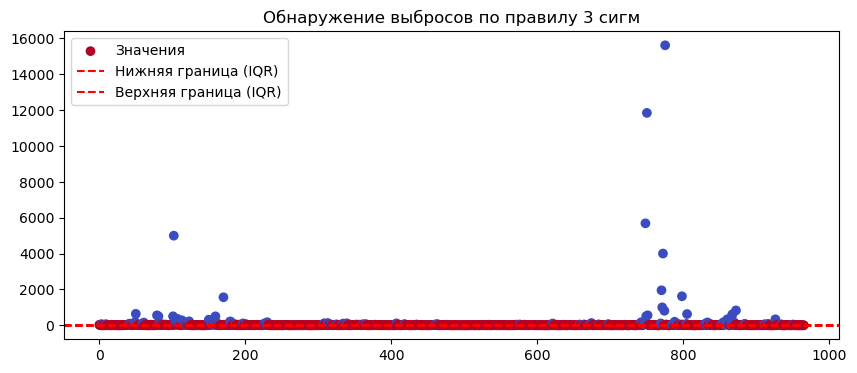

In [66]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Отбросим выбросов по 3-м сигмам значительно меньше, чем по правилу Тьюки. 

Данные распределены близко к нормальному распределнию, следовательно отбросим выбросы по 3 sigma

In [67]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median,is_outlier_3σ,is_outlier_IQR
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,1,False,False
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,1,False,False
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,0,False,False
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,1,False,True
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0,False,False
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0,False,False
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0,False,False
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0,False,False


In [68]:
target_old = target
target = "SI_gt_median"

In [69]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI_gt_median
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,1
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,1
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,1
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,0
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,0
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,0
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,0


In [70]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [71]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,6.369345,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.179657,3.613328,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436


In [72]:
y_ic50

0      1
1      1
2      0
3      1
4      0
      ..
961    0
962    0
963    0
964    0
965    0
Name: SI_gt_median, Length: 961, dtype: int64

In [73]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

In [74]:
class_ratio = np.mean(y_train_ic50)
print(f"Баланс классов: {class_ratio:.2f} / {1-class_ratio:.2f}")

Баланс классов: 0.51 / 0.49


## Инициализация моделей и метрик

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, roc_curve)
import numpy as np

In [76]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [77]:
MODELS = {
    'logreg': LogisticRegression(random_state=RANDOM_STATE),
    'rf': RandomForestClassifier(random_state=RANDOM_STATE),
    'xgb': XGBClassifier(random_state=RANDOM_STATE),
}

metrics = {
    'ROC-AUC': roc_auc_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'PRECISION': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'RECALL': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

## Бейзлайн

Проверим перечисленные модели

In [78]:
results = []

for name, model in MODELS.items():
    
    cv_scores = cross_val_score(model, X_train, y_train_ic50,
                               cv=5, scoring='roc_auc', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            model_metrics[metric_name] = metric_func(y_test_ic50, y_proba)
        else:
            model_metrics[metric_name] = metric_func(y_test_ic50, y_pred)
    
    results.append({
        'model': name,
        'cv_mean_roc_auc': np.mean(cv_scores),
        'cv_std_roc_auc': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

    model  cv_mean_roc_auc  cv_std_roc_auc   ROC-AUC        F1  PRECISION  \
0  logreg         0.660159        0.025633  0.724808  0.651515   0.641791   
1      rf         0.686892        0.031053  0.703942  0.595745   0.552632   
2     xgb         0.659296        0.030765  0.684231  0.638298   0.592105   

     RECALL  
0  0.661538  
1  0.646154  
2  0.692308  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [79]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [80]:
N_TRIALS_LR = 100
CV_FOLDS_LR = 10

N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

### LogisticRegression

In [81]:
def optimize_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': 'saga',
        'max_iter': 1000,
        'random_state': RANDOM_STATE
    }
    model = LogisticRegression(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_LR, scoring='roc_auc', n_jobs=-1
    ).mean()

In [82]:
study_lr = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_lr.optimize(optimize_lr, n_trials=N_TRIALS_LR, n_jobs=1)

[I 2025-06-04 00:26:56,341] A new study created in memory with name: no-name-88df116c-a29c-4711-952d-efaf23001f9c
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-06-04 00:26:58,467] Trial 0 finished with value: 0.6627403083482055 and parameters: {'C': 0.3148911647956863, 'penalty': 'l1'}. Best is trial 0 with value: 0.6627403083482055.
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

In [83]:
print(f"Лучшие параметры для Logistic Regression:")
print(study_lr.best_params)
print(f"Лучший ROC-AUC: {study_lr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_lr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_lr)
fig.show()

Лучшие параметры для Logistic Regression:
{'C': 0.03527379348465842, 'penalty': 'l2'}
Лучший ROC-AUC: 0.6708


In [84]:
best_params_lr = study_lr.best_params
best_params_lr.update({
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': RANDOM_STATE
})
best_lr_model = LogisticRegression(**best_params_lr)

In [85]:
best_lr_model.fit(X_train, y_train_ic50)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = best_lr_model.predict(X_test)

In [86]:
final_metrics_lr = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_lr),
    'f1': f1_score(y_test_ic50, y_pred_lr),
    'precision': precision_score(y_test_ic50, y_pred_lr),
    'recall': recall_score(y_test_ic50, y_pred_lr),
    'accuracy': (y_pred_lr == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_lr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7313
f1: 0.6202
precision: 0.6250
recall: 0.6154
accuracy: 0.6621


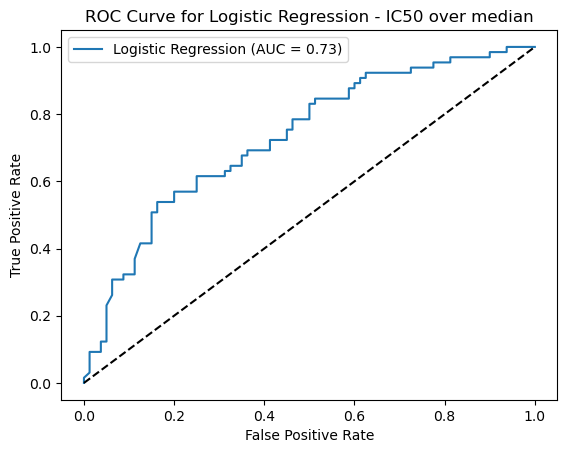

In [87]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {final_metrics_lr["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Logistic Regression - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Logistic Regression - IC50 over median')

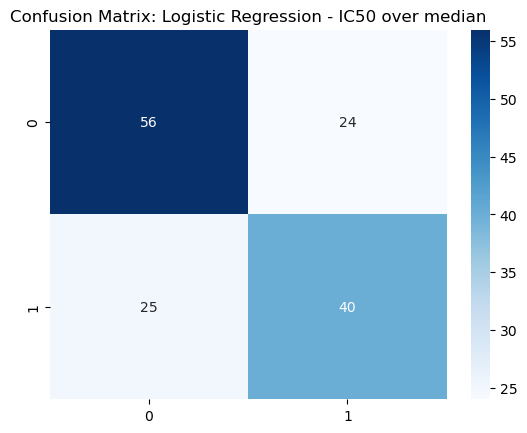

In [88]:
cm = confusion_matrix(y_test_ic50, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Logistic Regression - IC50 over median')

In [89]:
if hasattr(best_lr_model, 'feature_importances_'):
    importances = best_lr_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### Random Forest

In [90]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_RF, scoring='roc_auc', n_jobs=-1
    ).mean()

In [91]:
study_rf = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-04 00:27:55,581] A new study created in memory with name: no-name-277ff5e9-2564-4a64-999f-34727f5173c9
[I 2025-06-04 00:27:58,626] Trial 0 finished with value: 0.7146073234469279 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7146073234469279.
[I 2025-06-04 00:27:59,265] Trial 1 finished with value: 0.7130527286762415 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7146073234469279.
[I 2025-06-04 00:28:03,380] Trial 2 finished with value: 0.7133766217670888 and parameters: {'n_estimators': 850, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.7146073234469279.
[I 2025-06-04 00:28:05,569] Trial 3 finished with value: 0.7174641122064531 and parameters: {'n_estimators': 489, 'max_depth': 12, 

In [92]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший ROC-AUC: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 553, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Лучший ROC-AUC: 0.7185


In [93]:
best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_params_rf)

In [94]:
best_rf_model.fit(X_train, y_train_ic50)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

In [95]:
final_metrics_rf = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_rf),
    'f1': f1_score(y_test_ic50, y_pred_rf),
    'precision': precision_score(y_test_ic50, y_pred_rf),
    'recall': recall_score(y_test_ic50, y_pred_rf),
    'accuracy': (y_pred_rf == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7267
f1: 0.6015
precision: 0.5882
recall: 0.6154
accuracy: 0.6345


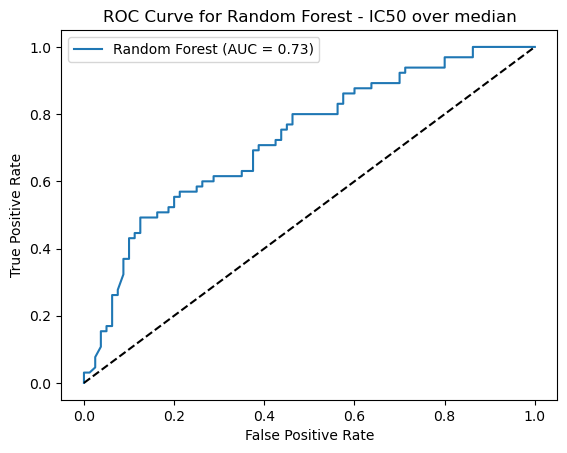

In [96]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

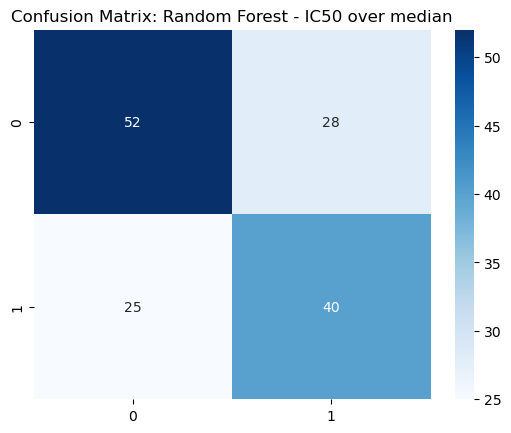

In [97]:
cm = confusion_matrix(y_test_ic50, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

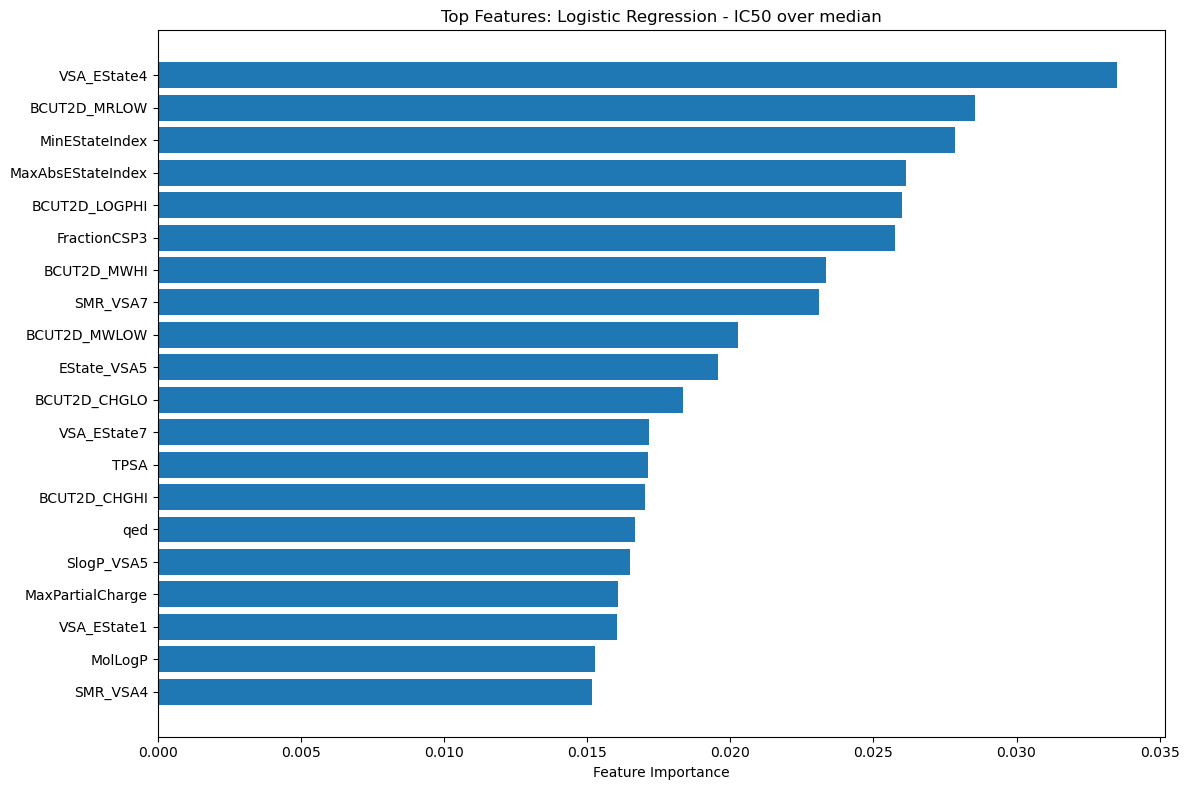

In [98]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### XGBoost

In [99]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'use_label_encoder': False,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }
    model = XGBClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_XGB, scoring='roc_auc', n_jobs=-1
    ).mean()

In [100]:
study_xgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-04 00:37:49,640] A new study created in memory with name: no-name-95c906ba-24ea-4bf5-af76-4a38b0fdf024


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:37:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:37:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:37:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: 

In [101]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший ROC-AUC: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 167, 'max_depth': 8, 'learning_rate': 0.010809956815437735, 'subsample': 0.7686932176474901, 'colsample_bytree': 0.7042068234769092, 'gamma': 0.19634435846035245, 'reg_alpha': 1.667298065662335, 'reg_lambda': 2.364674306002505}
Лучший ROC-AUC: 0.7178


In [102]:
best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_params_xgb)

In [103]:
best_xgb_model.fit(X_train, y_train_ic50)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb_model.predict(X_test)

In [104]:
final_metrics_xgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_xgb),
    'f1': f1_score(y_test_ic50, y_pred_xgb),
    'precision': precision_score(y_test_ic50, y_pred_xgb),
    'recall': recall_score(y_test_ic50, y_pred_xgb),
    'accuracy': (y_pred_xgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7267
f1: 0.6015
precision: 0.5882
recall: 0.6154
accuracy: 0.6345


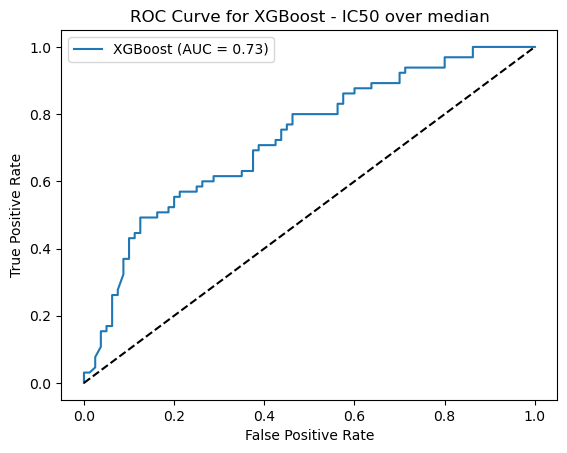

In [105]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

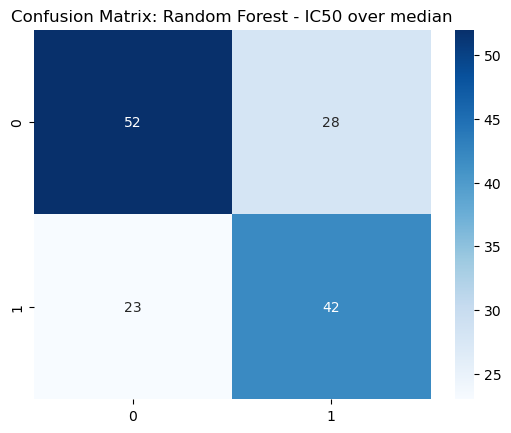

In [106]:
cm = confusion_matrix(y_test_ic50, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

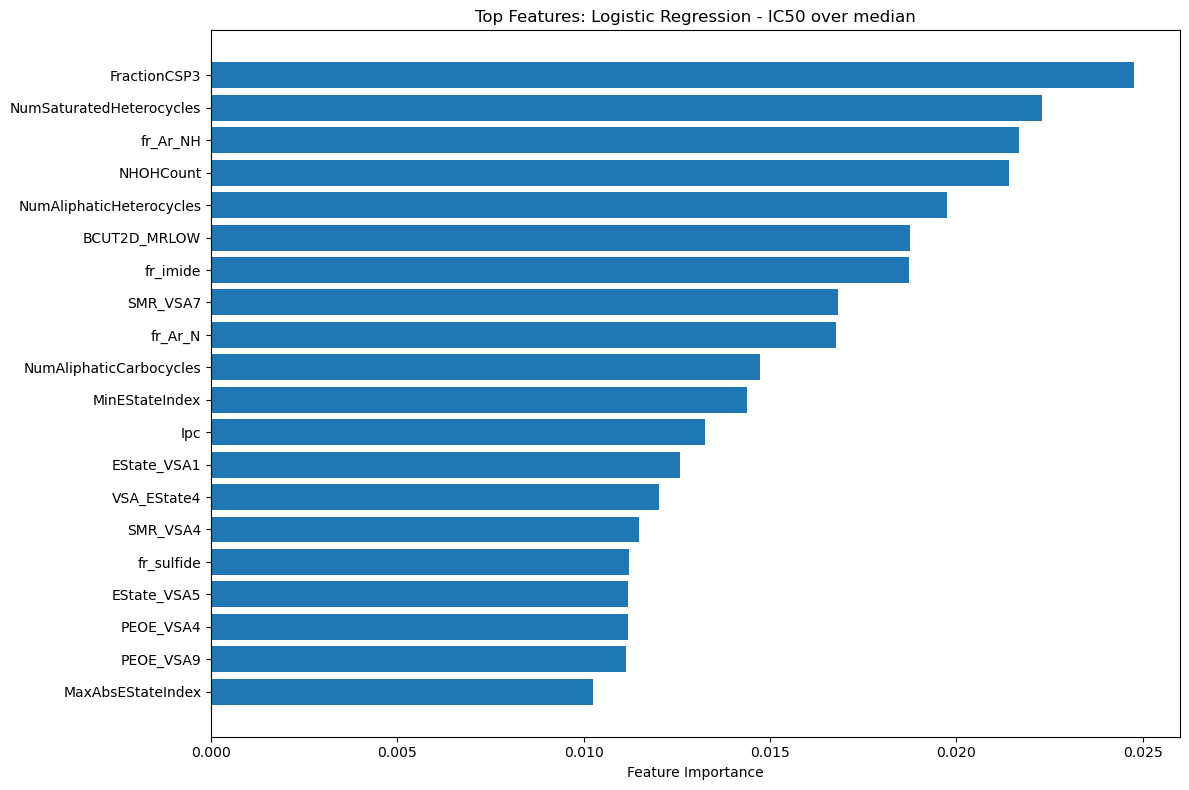

In [107]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

## Сравнение моделей

In [108]:
metrics_comparisson = {
    "LR": final_metrics_lr,
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [109]:
df_metrics

,LR,RF,XGB
roc_auc,0.731346,0.726731,0.726538
f1,0.620155,0.601504,0.622222
precision,0.625000,0.588235,0.600000
recall,0.615385,0.615385,0.646154
accuracy,0.662069,0.634483,0.648276


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

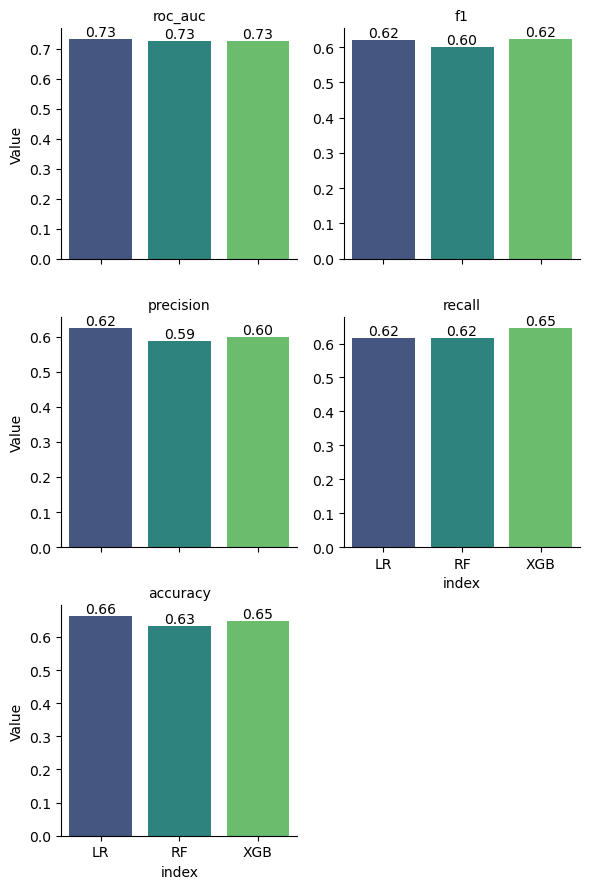

In [110]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Как видно, модель XGB в совокупности даёт лучшие результаты